In [92]:
# Exploratory Data Analysis (EDA)

import pandas as pd
from pathlib import Path
import plotly.express as px
import plotly.graph_objects as go
import numpy as np


root = Path.cwd().parent
print(root)

c:\Users\sebas\PycharmProjects\Git\Seb_branch\institutional-roi-analysis


In [93]:
df = pd.read_csv(root/"data"/"raw"/"scorecard"/"scorecard_FL_programs.csv")
df.head()

,code,title,unit_id,distance,school.type,school.main_campus,credential.level,earnings.4_yr.overall_median_earnings,earnings.4_yr.working_not_enrolled.overall_count,debt.staff_grad_plus.all.eval_inst.median,debt.staff_grad_plus.all.eval_inst.median_payment,school.name
0,3906,Theological and Ministerial Studies.,132408,3,"Private, nonprofit",1,3,31484.0,36.0,23946.0,254.0,Baptist University of Florida
1,1101,"Computer and Information Sciences, General.",132471,2,"Private, nonprofit",1,3,52714.0,66.0,27750.0,294.0,Barry University
2,1304,Educational Administration and Supervision.,132471,2,"Private, nonprofit",1,5,69477.0,87.0,51250.0,583.0,Barry University
3,2201,Law.,132471,1,"Private, nonprofit",1,7,62176.0,197.0,154477.0,1757.0,Barry University
4,2401,"Liberal Arts and Sciences, General Studies and...",132471,1,"Private, nonprofit",1,3,40411.0,36.0,38125.0,404.0,Barry University


In [94]:
df.isna().sum()

code                                                 0
title                                                0
unit_id                                              0
distance                                             0
school.type                                          0
school.main_campus                                   0
credential.level                                     0
earnings.4_yr.overall_median_earnings                0
earnings.4_yr.working_not_enrolled.overall_count     0
debt.staff_grad_plus.all.eval_inst.median            0
debt.staff_grad_plus.all.eval_inst.median_payment    0
school.name                                          0
dtype: int64

In [95]:
df.duplicated().sum()

np.int64(0)

In [96]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1538 entries, 0 to 1537
Data columns (total 12 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   code                                               1538 non-null   int64  
 1   title                                              1538 non-null   str    
 2   unit_id                                            1538 non-null   int64  
 3   distance                                           1538 non-null   int64  
 4   school.type                                        1538 non-null   str    
 5   school.main_campus                                 1538 non-null   int64  
 6   credential.level                                   1538 non-null   int64  
 7   earnings.4_yr.overall_median_earnings              1538 non-null   float64
 8   earnings.4_yr.working_not_enrolled.overall_count   1538 non-null   float64
 9   debt.staff_grad_plu

In [97]:
df.describe()

,code,unit_id,distance,school.main_campus,credential.level,earnings.4_yr.overall_median_earnings,earnings.4_yr.working_not_enrolled.overall_count,debt.staff_grad_plus.all.eval_inst.median,debt.staff_grad_plus.all.eval_inst.median_payment
count,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000
mean,3732.440182,219304.497399,1.475293,0.809493,3.017555,51970.442133,159.837451,27568.488947,302.143043
std,1693.623708,140554.436996,0.812861,0.392829,1.387866,22434.632713,368.124786,29789.610146,340.883162
min,100.000000,132408.000000,0.000000,0.000000,1.000000,12467.000000,16.000000,3167.000000,34.000000
25%,1609.000000,133997.000000,1.000000,1.000000,2.000000,36910.000000,36.000000,15000.000000,159.000000
50%,4653.000000,136215.000000,1.000000,1.000000,3.000000,48033.500000,68.000000,20000.000000,212.000000
75%,5135.000000,385619.000000,2.000000,1.000000,3.000000,64225.250000,155.000000,29247.250000,317.500000
max,5401.000000,497222.000000,3.000000,1.000000,8.000000,192498.000000,6804.000000,406377.000000,4623.000000


Initial inspection confirms no missing values or duplicates. The dataset contains 1,538 program-level observations across Florida institutions.

How concentrated are earnings and debt outcomes across programs?

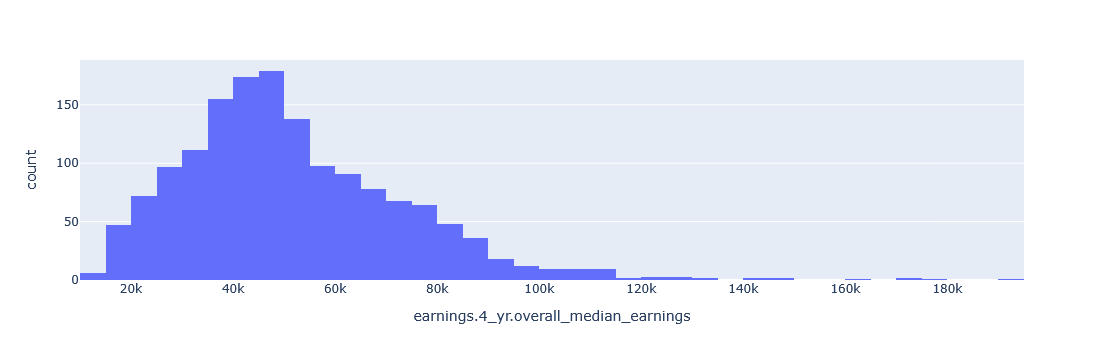

In [98]:
px.histogram(df, x="earnings.4_yr.overall_median_earnings")

Median earnings appear right-skewed, suggesting the presence of high-earning outliers. Log transformation is applied to stabilize variance.

Does log transformation improve comparability across programs?

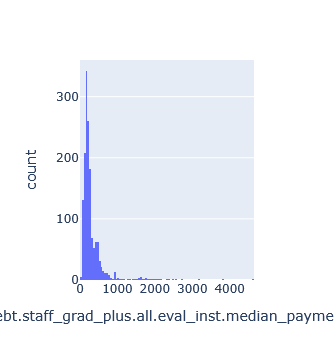

In [99]:
px.histogram(
    df,
    x="debt.staff_grad_plus.all.eval_inst.median_payment"
)

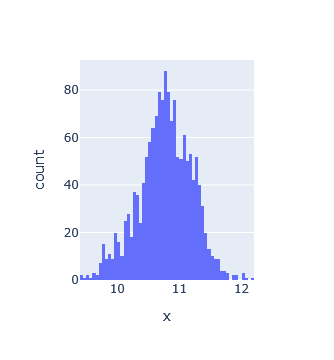

In [100]:
px.histogram(df, x=np.log1p(df["earnings.4_yr.overall_median_earnings"]))

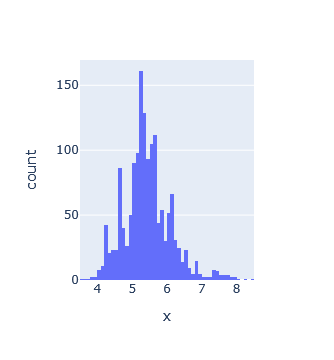

In [101]:
px.histogram(df, x=np.log1p(df["debt.staff_grad_plus.all.eval_inst.median_payment"]))

Debt and debt payment distributions exhibit similar skewness, reinforcing the need for transformation prior to modeling.

In [102]:
dfx = df
dfx["log_median_earnings"]=np.log1p(dfx["earnings.4_yr.overall_median_earnings"])
dfx["log_median_debt_payment"]=np.log1p(dfx["debt.staff_grad_plus.all.eval_inst.median_payment"]*12)
dfx["log_median_debt"]=np.log1p(dfx["debt.staff_grad_plus.all.eval_inst.median"])

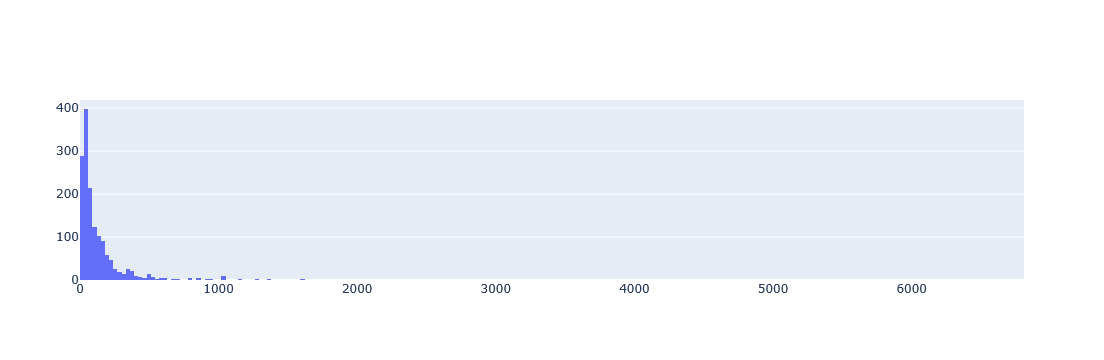

In [103]:
earning_count = go.Figure(
    go.Histogram(
        x=df["earnings.4_yr.working_not_enrolled.overall_count"],
        xbins=dict(start=0, end=6804, size=30)
    )
)

earning_count.show()


What is an appropriate threshold to remove low graduate programs?

In [104]:
dfx = dfx.loc[df["earnings.4_yr.working_not_enrolled.overall_count"] >= 25].reset_index()
lt50=len(df) - len(dfx)
lt50

190

Programs with fewer than 25 observed earners are excluded to reduce instability in earnings estimates.

In [105]:
summary_overview = pd.DataFrame({
    "Total Programs": [len(df)],
    "After ≥25 student Threshold": [len(dfx)],
    "Mean Earnings": [dfx["earnings.4_yr.overall_median_earnings"].mean()],
    "Median Earnings": [dfx["earnings.4_yr.overall_median_earnings"].median()],
    "Median Debt": [dfx["debt.staff_grad_plus.all.eval_inst.median"].median()],
})
summary_overview


,Total Programs,After ≥25 student Threshold,Mean Earnings,Median Earnings,Median Debt
0,1538,1348,51775.038576,48033.5,19783.5


Filtering reduces the sample from 1,538 to 1,348 programs (about 12% removed).

Debt burden approximates the share of annual earnings required to service debt obligations.

How many programs exhibit unusually high financial stress relative to earnings?

In [106]:
dfx["debt_burden"] = (dfx["debt.staff_grad_plus.all.eval_inst.median_payment"]*12)/dfx["earnings.4_yr.overall_median_earnings"]
(dfx["debt_burden"]>=0.25).sum()

np.int64(21)

21 programs require at least 25% of annual earnings to service debt, indicating extreme financial stress.

In [107]:
(dfx["debt_burden"]<=0.02).sum()

np.int64(32)

32 programs require 2% or less of earnings, representing unusually low financial burden.

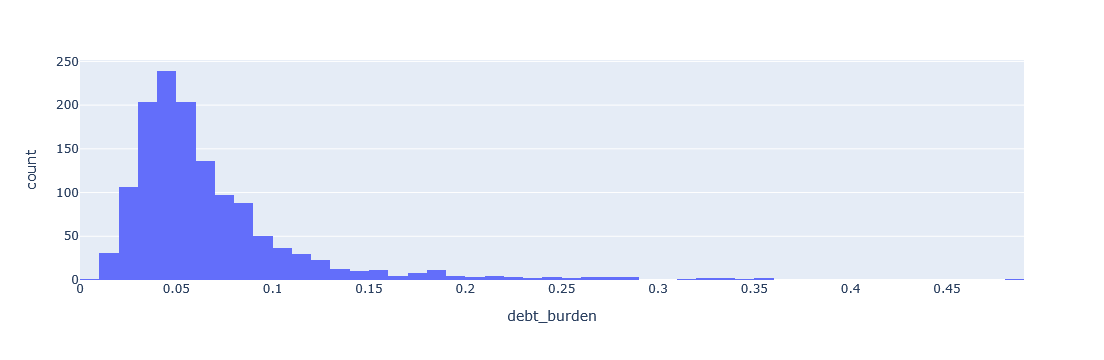

In [108]:
px.histogram(
    dfx,
    x="debt_burden"
)

In [109]:
dfx["debt_burden"].describe(percentiles=[.1,.25,.5,.75,.9])

count    1348.000000
mean        0.067795
std         0.048653
min         0.009007
10%         0.029909
25%         0.039711
50%         0.054346
75%         0.079315
90%         0.114919
max         0.483266
Name: debt_burden, dtype: float64

In [110]:
dfx["log_debt_burden"] = np.log1p(dfx["debt_burden"])

The median program requires about 5.4% of earnings to service debt. However, the upper tail extends sharply, with the 90th percentile approaching 11.5% and extreme cases near 48%.

Is financial stress concentrated in specific credential levels or institutional types?

In [111]:
dfx["earnings_to_debt_ratio"] = (
    dfx["earnings.4_yr.overall_median_earnings"] /
    dfx["debt.staff_grad_plus.all.eval_inst.median"]
)

fltop10 = dfx.sort_values("earnings_to_debt_ratio", ascending=False)["title"].head(10)
dfx.sort_values("earnings_to_debt_ratio", ascending=False).head(10)


,index,code,title,unit_id,distance,school.type,school.main_campus,credential.level,earnings.4_yr.overall_median_earnings,earnings.4_yr.working_not_enrolled.overall_count,debt.staff_grad_plus.all.eval_inst.median,debt.staff_grad_plus.all.eval_inst.median_payment,school.name,log_median_earnings,log_median_debt_payment,log_median_debt,debt_burden,log_debt_burden,earnings_to_debt_ratio
706,815,4301,Criminal Justice and Corrections.,136358,1,Public,1,1,69281.0,139.0,4892.0,52.0,Palm Beach State College,11.145940,6.437752,8.495561,0.009007,0.008966,14.162101
707,816,5109,"Allied Health Diagnostic, Intervention, and Tr...",136358,1,Public,1,1,50192.0,75.0,4025.0,43.0,Palm Beach State College,10.823631,6.248043,8.300529,0.010281,0.010228,12.470062
88,114,4301,Criminal Justice and Corrections.,133386,1,Public,1,1,49543.0,144.0,4446.0,47.0,Daytona State College,10.810616,6.336826,8.399985,0.011384,0.011320,11.143275
536,615,5138,"Registered Nursing, Nursing Administration, Nu...",134608,3,Public,1,3,78190.0,52.0,7250.0,77.0,Indian River State College,11.266910,6.829794,8.888895,0.011817,0.011748,10.784828
91,117,5109,"Allied Health Diagnostic, Intervention, and Tr...",133386,1,Public,1,1,51952.0,52.0,5500.0,58.0,Daytona State College,10.858095,6.546785,8.612685,0.013397,0.013308,9.445818
525,604,5109,"Allied Health Diagnostic, Intervention, and Tr...",134495,1,Public,1,1,49488.0,63.0,5500.0,58.0,Hillsborough Community College,10.809506,6.546785,8.612685,0.014064,0.013966,8.997818
591,679,5138,"Registered Nursing, Nursing Administration, Nu...",135717,1,Public,1,2,73314.0,140.0,9500.0,101.0,Miami Dade College,11.202521,7.100852,9.159152,0.016532,0.016396,7.717263
32,39,5138,"Registered Nursing, Nursing Administration, Nu...",132709,1,Public,1,2,68951.0,95.0,9000.0,95.0,Broward College,11.141166,7.039660,9.105091,0.016533,0.016398,7.661222
579,666,5138,"Registered Nursing, Nursing Administration, Nu...",135160,1,Public,1,2,63996.0,89.0,8440.0,89.0,Florida Gateway College,11.066591,6.974479,9.040856,0.016689,0.016551,7.582464
521,599,5138,"Registered Nursing, Nursing Administration, Nu...",134343,1,Public,1,2,62103.0,110.0,8239.0,87.0,Gulf Coast State College,11.036566,6.951772,9.016756,0.016811,0.016671,7.537687


High earnings-to-debt ratios are concentrated in applied public programs such as Nursing and Criminal Justice.

In [112]:
flbott_10 = dfx.sort_values("earnings_to_debt_ratio", ascending=True)["title"].head(10)
dfx.sort_values("earnings_to_debt_ratio", ascending=True).head(10)

,index,code,title,unit_id,distance,school.type,school.main_campus,credential.level,earnings.4_yr.overall_median_earnings,earnings.4_yr.working_not_enrolled.overall_count,debt.staff_grad_plus.all.eval_inst.median,debt.staff_grad_plus.all.eval_inst.median_payment,school.name,log_median_earnings,log_median_debt_payment,log_median_debt,debt_burden,log_debt_burden,earnings_to_debt_ratio
673,776,5104,Dentistry.,136215,0,"Private, nonprofit",1,6,114794.0,175.0,406377.0,4623.0,Nova Southeastern University,11.650903,10.923724,12.915039,0.483266,0.394246,0.282482
13,17,5112,Medicine.,132471,1,"Private, nonprofit",1,7,106396.0,88.0,278906.0,3173.0,Barry University,11.574933,10.547366,12.538634,0.357871,0.305918,0.381476
654,756,1310,Special Education and Teaching.,136215,3,"Private, nonprofit",1,5,48527.0,62.0,125828.0,1431.0,Nova Southeastern University,10.789896,9.751094,11.742679,0.353865,0.302963,0.385661
297,353,5112,Medicine.,133951,1,Public,1,7,82512.0,67.0,207971.0,2366.0,Florida International University,11.320711,10.253898,12.245159,0.344095,0.295721,0.396748
3,3,2201,Law.,132471,1,"Private, nonprofit",1,7,62176.0,197.0,154477.0,1757.0,Barry University,11.037740,9.956317,11.947807,0.339102,0.291999,0.402494
608,704,5112,Medicine.,135726,1,"Private, nonprofit",1,7,83257.0,271.0,202806.0,2307.0,University of Miami,11.329699,10.228646,12.220010,0.332513,0.287066,0.410525
296,352,5109,"Allied Health Diagnostic, Intervention, and Tr...",133951,1,Public,1,5,49226.0,39.0,117918.0,1341.0,Florida International University,10.804198,9.686140,11.677753,0.326900,0.282846,0.417460
677,780,5112,Medicine.,136215,0,"Private, nonprofit",1,6,143354.0,377.0,336670.0,3830.0,Nova Southeastern University,11.873079,10.735548,12.726861,0.320605,0.278090,0.425800
858,990,2201,Law.,137476,0,"Private, nonprofit",1,6,71477.0,296.0,166022.0,1889.0,St. Thomas University,11.177145,10.028754,12.019882,0.317137,0.275460,0.430527
1086,1266,2201,Law.,442295,1,"Private, nonprofit",1,7,69213.0,116.0,144259.0,1641.0,Ave Maria School of Law,11.144958,9.888019,11.879373,0.284513,0.250380,0.479783


Low earnings-to-debt ratios are concentrated in professional programs (Law, Medicine, Dentistry), reflecting high borrowing levels relative to early-career earnings.

In [113]:
dfx.sort_values("earnings_to_debt_ratio", ascending=True)[df["credential.level"]<6].head(10)

C:\Users\sebas\AppData\Local\Temp\ipykernel_9924\1564741994.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,index,code,title,unit_id,distance,school.type,school.main_campus,credential.level,earnings.4_yr.overall_median_earnings,earnings.4_yr.working_not_enrolled.overall_count,debt.staff_grad_plus.all.eval_inst.median,debt.staff_grad_plus.all.eval_inst.median_payment,school.name,log_median_earnings,log_median_debt_payment,log_median_debt,debt_burden,log_debt_burden,earnings_to_debt_ratio
673,776,5104,Dentistry.,136215,0,"Private, nonprofit",1,6,114794.0,175.0,406377.0,4623.0,Nova Southeastern University,11.650903,10.923724,12.915039,0.483266,0.394246,0.282482
13,17,5112,Medicine.,132471,1,"Private, nonprofit",1,7,106396.0,88.0,278906.0,3173.0,Barry University,11.574933,10.547366,12.538634,0.357871,0.305918,0.381476
654,756,1310,Special Education and Teaching.,136215,3,"Private, nonprofit",1,5,48527.0,62.0,125828.0,1431.0,Nova Southeastern University,10.789896,9.751094,11.742679,0.353865,0.302963,0.385661
297,353,5112,Medicine.,133951,1,Public,1,7,82512.0,67.0,207971.0,2366.0,Florida International University,11.320711,10.253898,12.245159,0.344095,0.295721,0.396748
608,704,5112,Medicine.,135726,1,"Private, nonprofit",1,7,83257.0,271.0,202806.0,2307.0,University of Miami,11.329699,10.228646,12.220010,0.332513,0.287066,0.410525
296,352,5109,"Allied Health Diagnostic, Intervention, and Tr...",133951,1,Public,1,5,49226.0,39.0,117918.0,1341.0,Florida International University,10.804198,9.686140,11.677753,0.326900,0.282846,0.417460
677,780,5112,Medicine.,136215,0,"Private, nonprofit",1,6,143354.0,377.0,336670.0,3830.0,Nova Southeastern University,11.873079,10.735548,12.726861,0.320605,0.278090,0.425800
858,990,2201,Law.,137476,0,"Private, nonprofit",1,6,71477.0,296.0,166022.0,1889.0,St. Thomas University,11.177145,10.028754,12.019882,0.317137,0.275460,0.430527
1086,1266,2201,Law.,442295,1,"Private, nonprofit",1,7,69213.0,116.0,144259.0,1641.0,Ave Maria School of Law,11.144958,9.888019,11.879373,0.284513,0.250380,0.479783
1070,1249,5133,Alternative and Complementary Medicine and Med...,439446,1,"Private, nonprofit",1,5,29614.0,25.0,61500.0,700.0,Atlantic Institute of Oriental Medicine,10.296036,9.036106,11.026809,0.283650,0.249707,0.481528


In [114]:
dfx.groupby("credential.level").agg({
    "earnings.4_yr.overall_median_earnings": "median",
    "debt.staff_grad_plus.all.eval_inst.median": "median",
    "debt_burden": "median",
    "unit_id": "count"
})

,earnings.4_yr.overall_median_earnings,debt.staff_grad_plus.all.eval_inst.median,debt_burden,unit_id
credential.level,,,,
1,24719.0,9500.0,0.047128,217
2,41859.5,18784.5,0.052843,218
3,49000.0,19250.0,0.050230,641
5,62299.0,41000.0,0.086308,226
6,78641.5,127406.0,0.222583,22
7,88273.0,162455.0,0.260056,17
8,70409.0,46692.0,0.084563,7


Median earnings increase with credential level; however, median debt increases disproportionately at professional levels (5 and 6), producing elevated debt burden at higher tiers.